In [892]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import zscore

In [1094]:
import warnings
warnings.filterwarnings("ignore")

In [893]:
pd.set_option('display.max_columns',None)

In [894]:
train = pd.read_csv('TRAIN_SET_2021.csv')
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.959983,13.004886,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.719365,3.922086,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.442637,10.312777,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.988293,4.163975,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.980282,13.462786,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [895]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

## Exploratory Data Analysis

In [897]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.959983,13.004886,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.719365,3.922086,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.442637,10.312777,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.988293,4.163975,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.980282,13.462786,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [898]:
categorical_col = ['RESTAURANT_CATEGORY','CITY','STATE','CURRENT_GRADE','INSPECTION_TYPE',
                  'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE',
                   'FIRST_VIOLATION','SECOND_VIOLATION','THIRD_VIOLATION','NEXT_INSPECTION_GRADE_C_OR_BELOW']

In [899]:
numeric_col = ['CURRENT_DEMERITS','EMPLOYEE_COUNT','MEDIAN_EMPLOYEE_AGE','MEDIAN_EMPLOYEE_TENURE',
              'INSPECTION_DEMERITS','NUMBER_OF_VIOLATIONS']

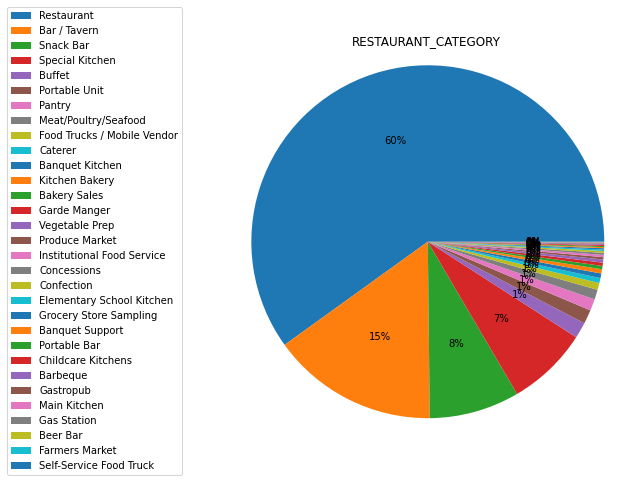

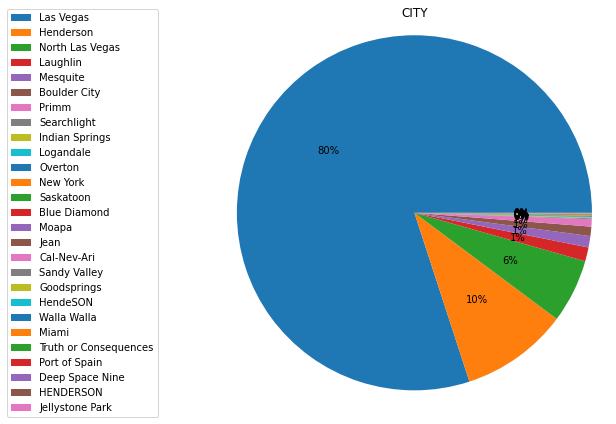

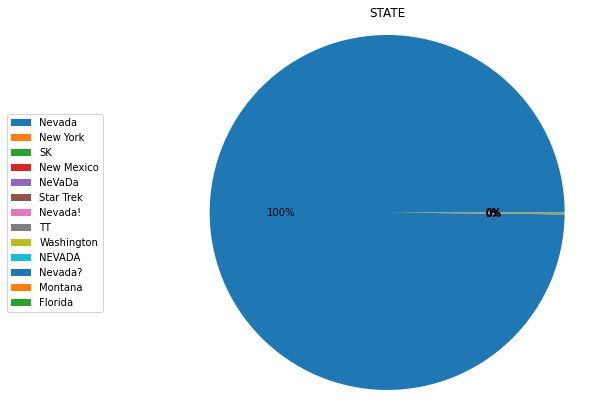

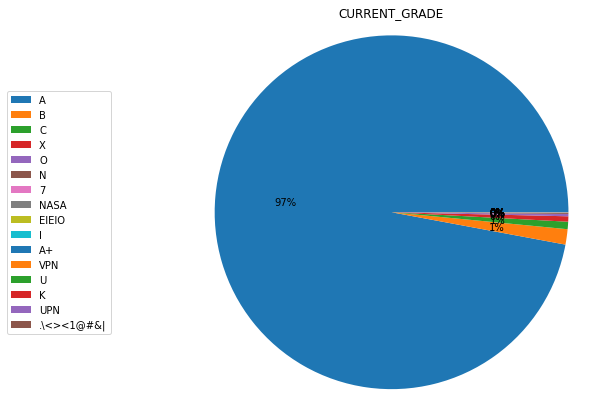

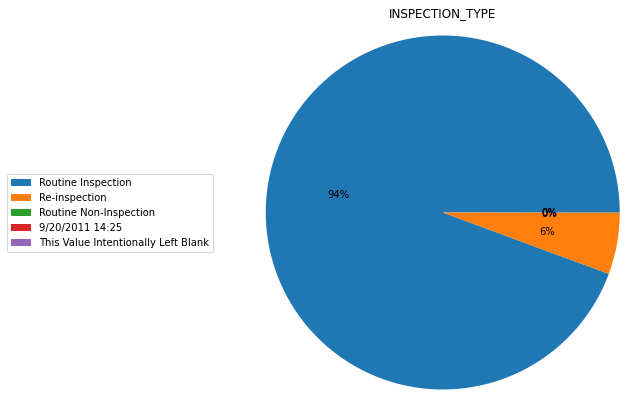

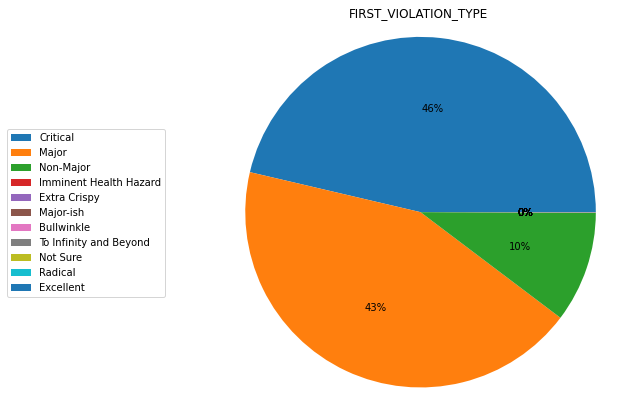

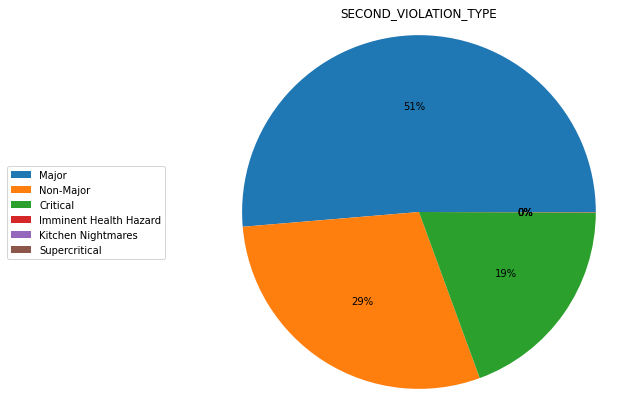

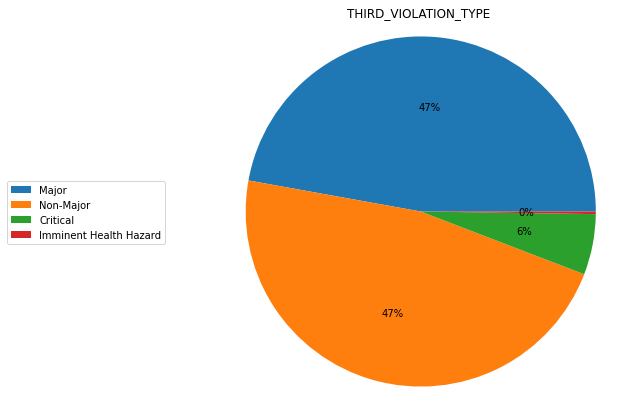

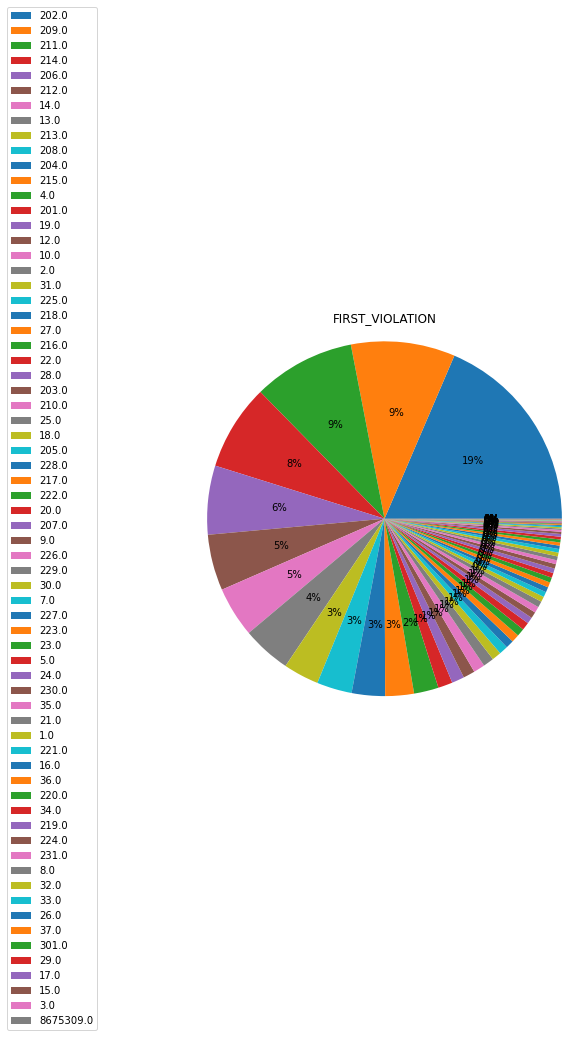

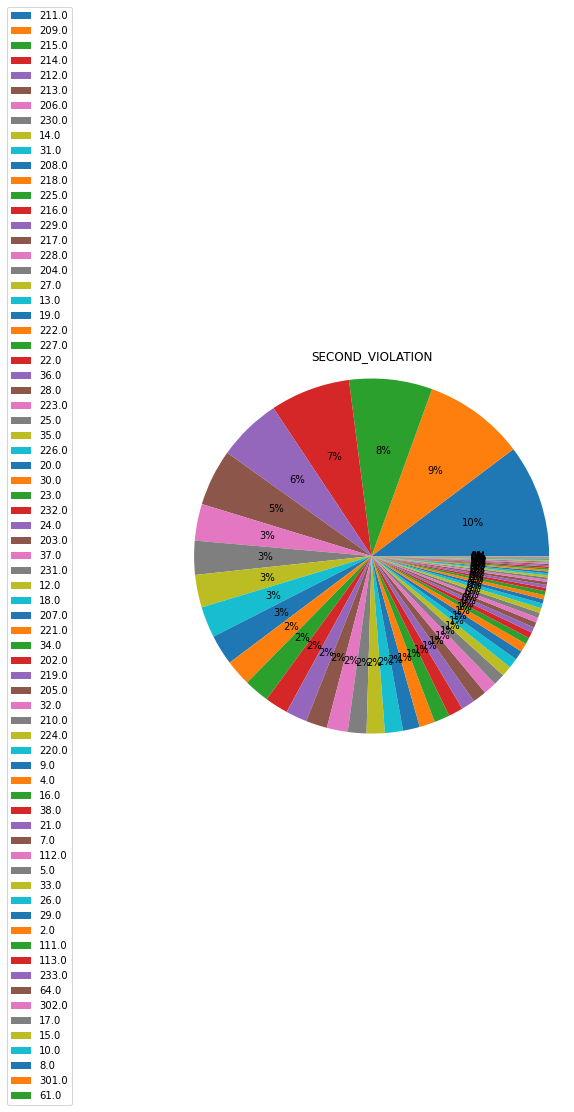

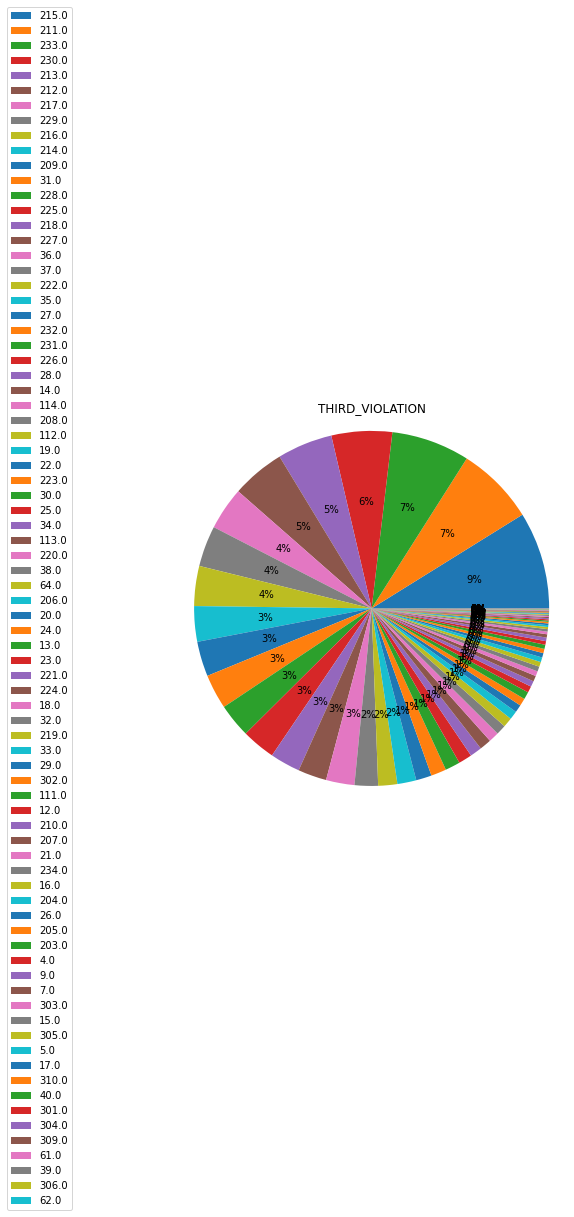

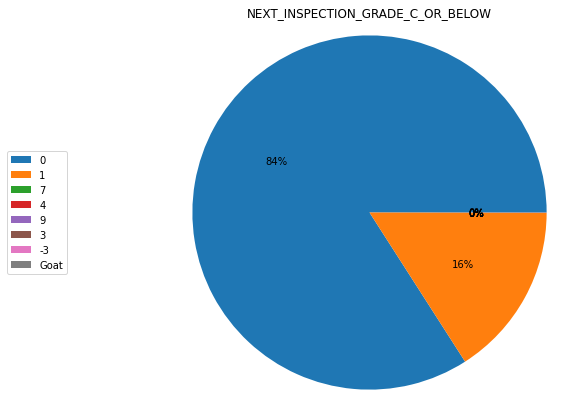

In [900]:
for col in categorical_col:
    plt.figure(figsize=(7,7))
    plt.pie(train[col].value_counts(),autopct='%.0f%%')
    plt.legend(train[col].value_counts().index,loc='center',bbox_to_anchor=(-0.35, .5))
    plt.axis('equal')
    plt.title(col)
    plt.show()

## Insights from the initial analysis on dimensions
### Restaurant_Category
90% of the inspections were done on the following 4 categories- Restaurant, Bar/Tavern, Snack Bar, Special Kitchen
### City
The cities Las Vegas, Henderson, North Las Vegas contribute to 96% of the total data
### State
Almost every inspection was performed in Nevada
### Current_Grade
The current grade for 97% of the inspections is A.
### Inspection_Type
Routine Inspection and Re-inspection account for nearly 100% of the data
### First_Violation_Type
Major and critical violations are the most common types of first violations found during inspections.
### Second_Violation_Type
Major violations account for more than half of the second violation types during inspections.
One in every two inspections falls under major type during the second violation.  
### Third_Violation_Type
Third violation type for majority of the inspections are major and critical.
### First, Second and Third Violations
All the inspections are scattered among different violations.

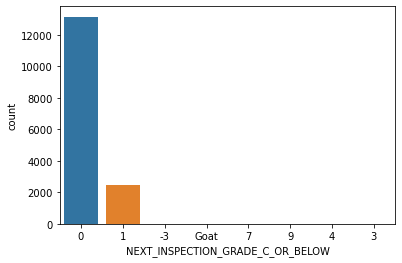

In [901]:
sns.countplot(data=train,x='NEXT_INSPECTION_GRADE_C_OR_BELOW')
plt.show()

In [902]:
train['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()

0       13143
1        2484
7           1
4           1
9           1
3           1
-3          1
Goat        1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

The target variable 'NEXT_INSPECTION_GRADE_C_OR_BELOW' highly imbalanced and inclined towards the value 0. All the values excluding 0 and 1 can be considered as outliers as their corresponding counts are negligible.

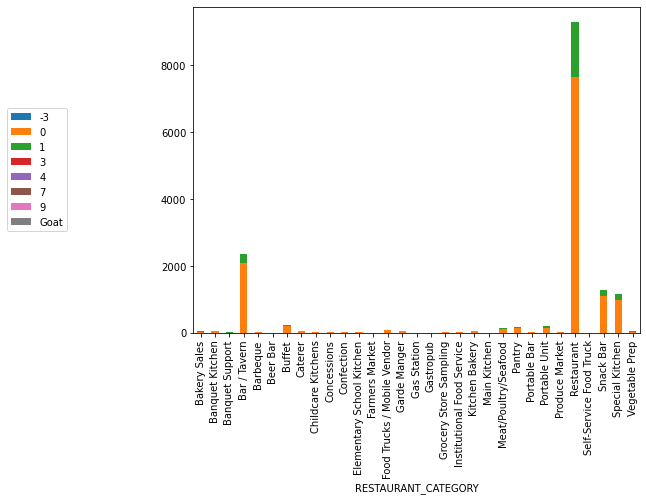

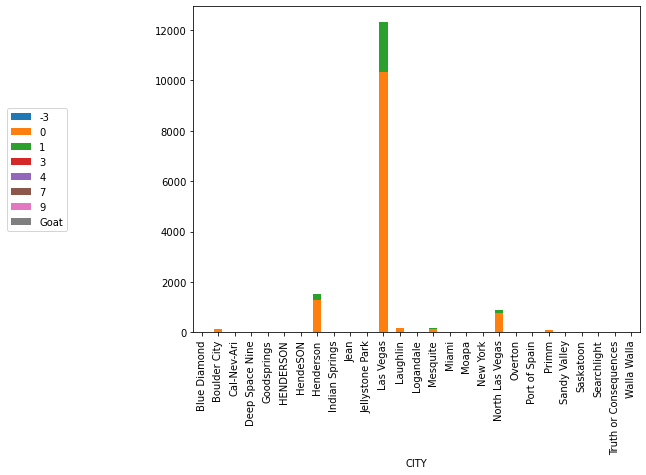

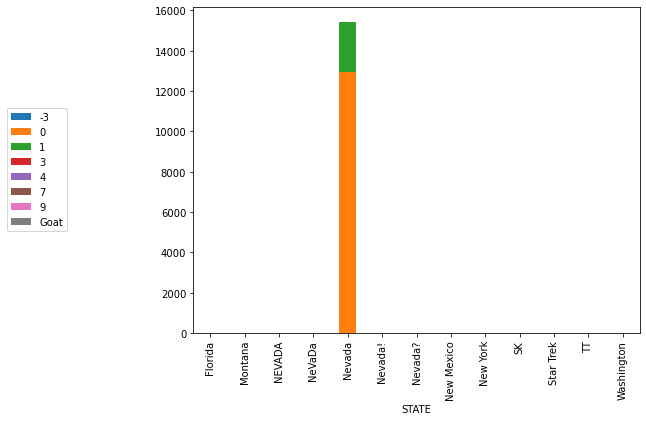

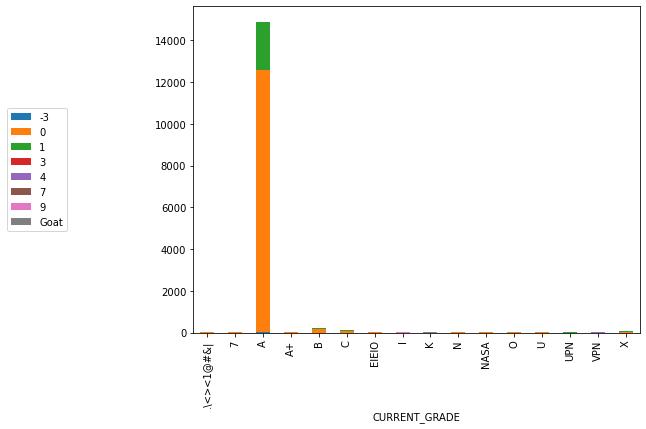

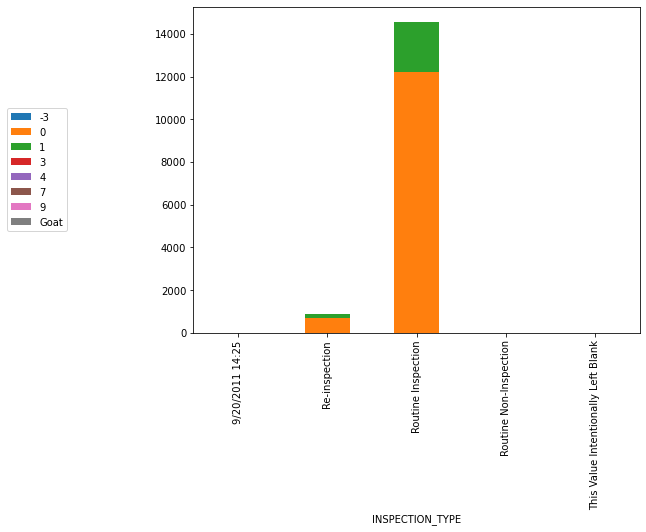

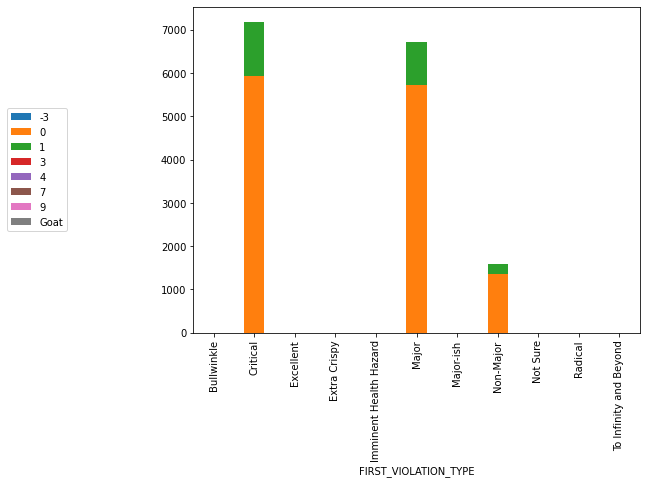

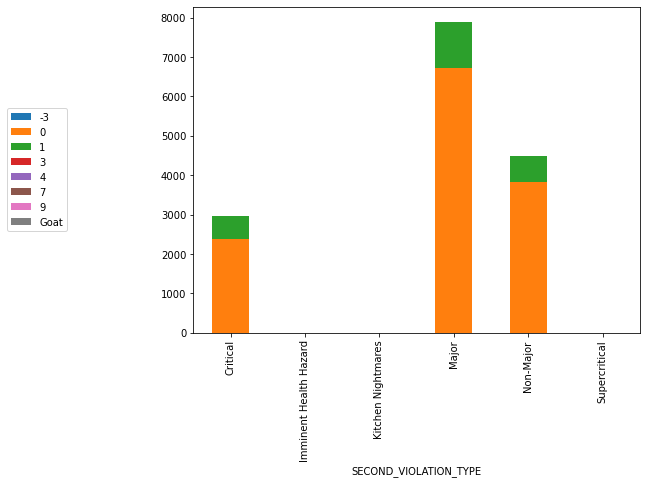

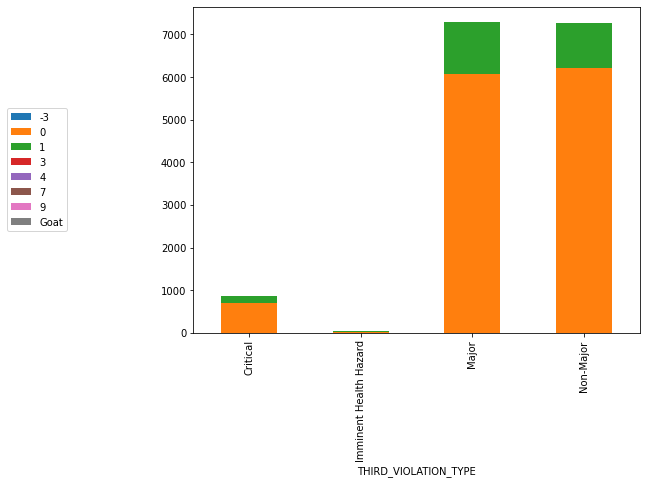

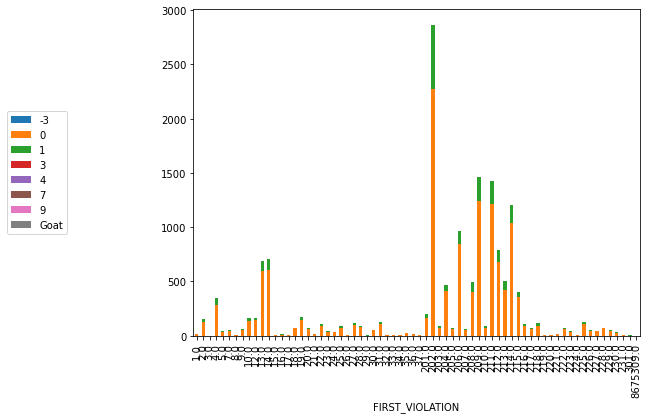

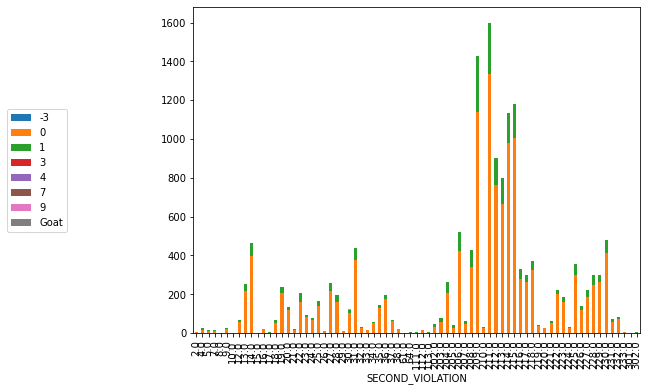

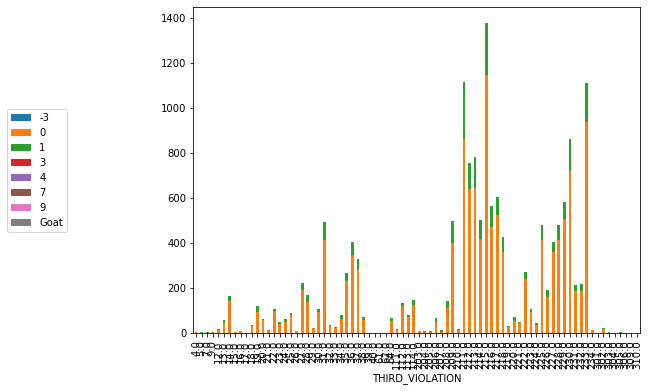

In [904]:
categorical_col = ['RESTAURANT_CATEGORY','CITY','STATE','CURRENT_GRADE','INSPECTION_TYPE',
                  'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE',
                  'FIRST_VIOLATION','SECOND_VIOLATION','THIRD_VIOLATION']
for col in categorical_col:
    temp=train.groupby([col, 'NEXT_INSPECTION_GRADE_C_OR_BELOW']).size().reset_index().pivot(columns='NEXT_INSPECTION_GRADE_C_OR_BELOW', index=col, values=0)
    temp.plot(kind='bar',stacked=True,figsize=(8,6))
    plt.legend(loc='center',bbox_to_anchor=(-0.35,.5))
    plt.xticks(rotation=90)
    plt.show()

It can be observed from the above plots that class 0 dominates class 1 in all the features.
Note: All the class values other than 0 and 1 can be considered irrelavant as their counts are negligible.

In [905]:
# Removing unnecessary rows
train = train[train['INSPECTION_DEMERITS']!='Routine Inspection']

In [906]:
train.loc[:,'INSPECTION_DEMERITS'] = train['INSPECTION_DEMERITS'].astype(float)

In [907]:
# Removing unnecessary rows
train = train[train['NUMBER_OF_VIOLATIONS']!='Nevada']

In [908]:
train.loc[:,'NUMBER_OF_VIOLATIONS'] = train['NUMBER_OF_VIOLATIONS'].astype(float)

In [1058]:
numeric_col

['CURRENT_DEMERITS',
 'EMPLOYEE_COUNT',
 'MEDIAN_EMPLOYEE_AGE',
 'MEDIAN_EMPLOYEE_TENURE',
 'INSPECTION_DEMERITS',
 'NUMBER_OF_VIOLATIONS']

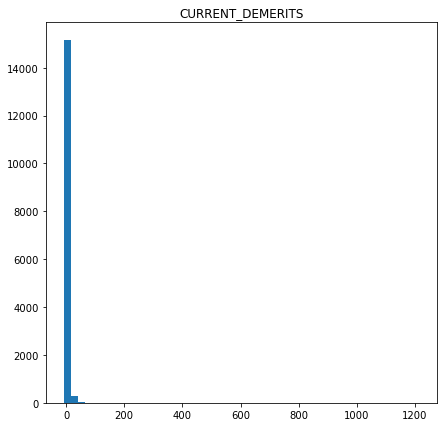

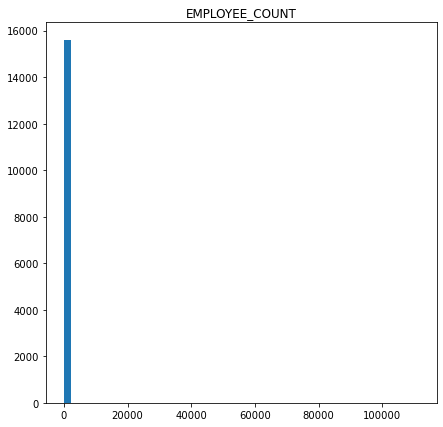

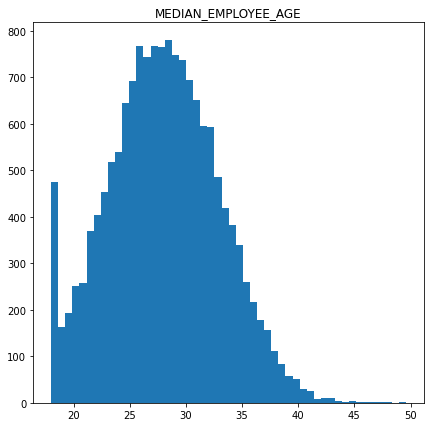

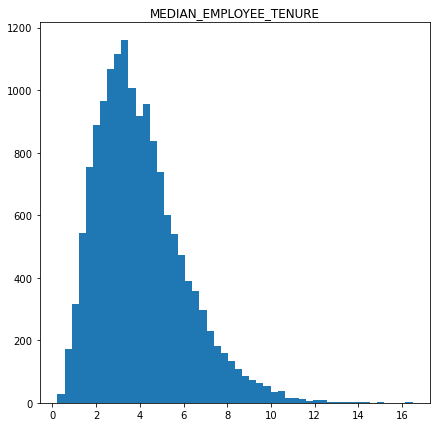

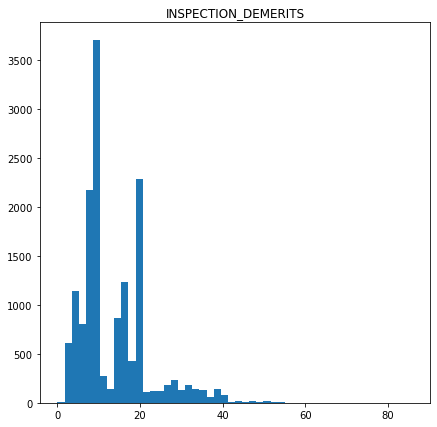

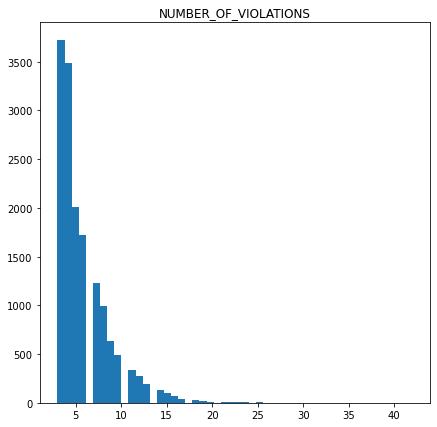

In [909]:
for col in numeric_col:
    plt.figure(figsize=(7,7))
    plt.hist(train[col],bins=50)
    plt.title(col)
    plt.show()

Histograms represent the distributions of the variables. From the above plots it can be observed that 'MEDIAN_EMPLOYEE_AGE','MEDIAN_EMPLOYEE_TENURE','INSPECTION_DEMERITS','NUMBER_OF_VIOLATIONS' are right skewed. The distributions of 'CURRENT_DEMERITS' and 'EMPLOYEE_COUNT' are confined to a region due to the presence of high valued outliers.

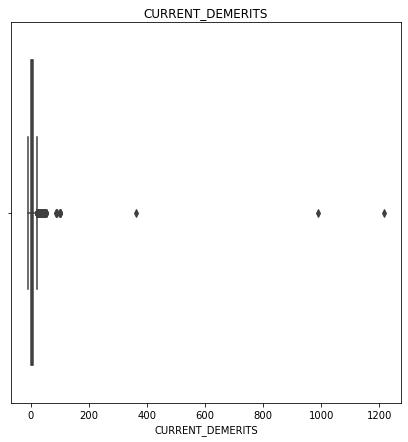

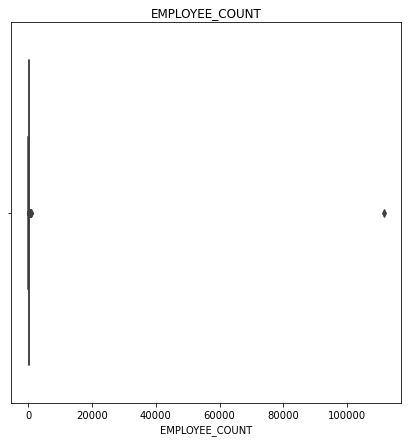

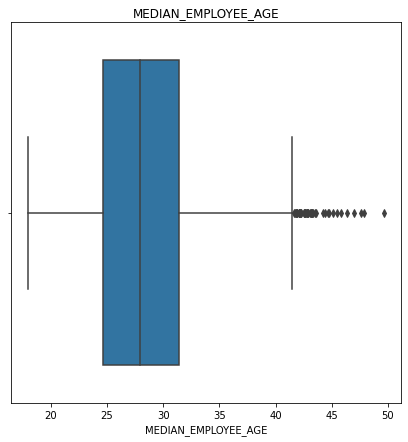

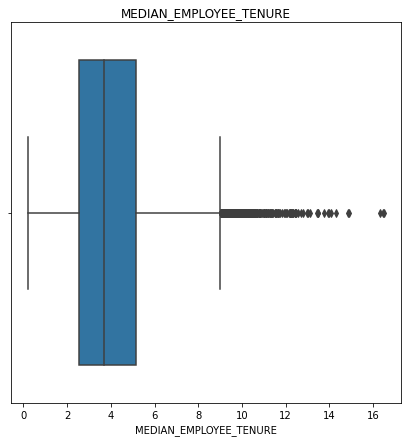

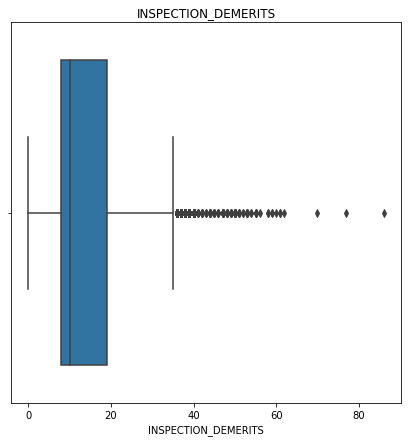

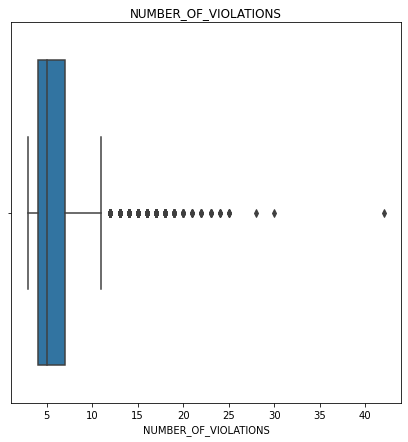

In [910]:
for col in numeric_col:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=train,x=col)
    plt.title(col)
    plt.show()

From the above boxplots, we can observe that CURRENT_DEMERITS and EMPLOYEE_COUNT have high valued outliers which led to improper visualizations. 

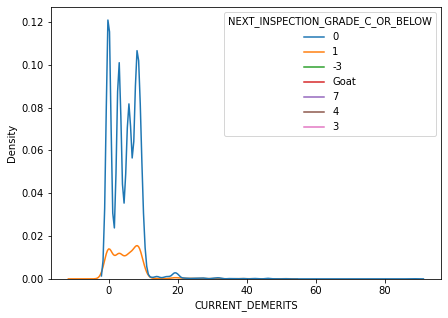

In [1095]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=train[train['CURRENT_DEMERITS']<100],x='CURRENT_DEMERITS',hue='NEXT_INSPECTION_GRADE_C_OR_BELOW')
plt.show()

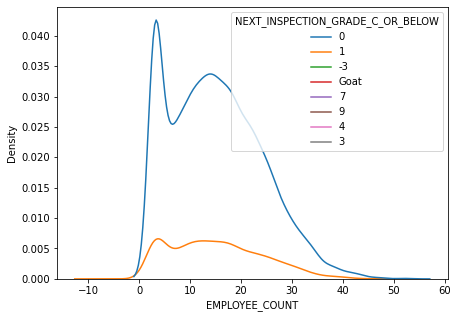

In [1096]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=train[train['EMPLOYEE_COUNT']<100],x='EMPLOYEE_COUNT',hue='NEXT_INSPECTION_GRADE_C_OR_BELOW')
plt.show()

The above kernel density plots of CURRENT_DEMERITS and EMPLOYEE_COUNT show their respective distributions excluding the outliers. Each color represents the distribution of the feature w.r.t different target classes. 

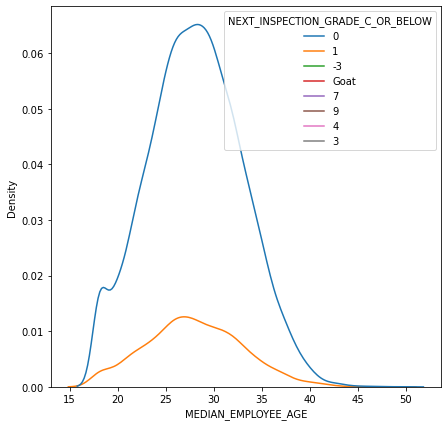

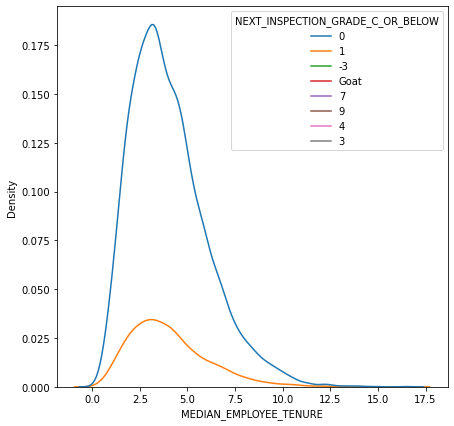

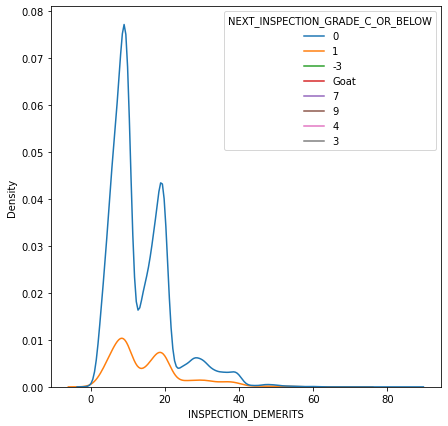

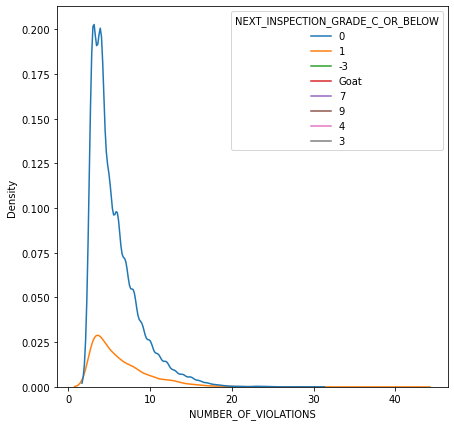

In [1097]:
cols = ['MEDIAN_EMPLOYEE_AGE','MEDIAN_EMPLOYEE_TENURE','INSPECTION_DEMERITS','NUMBER_OF_VIOLATIONS']
for col in cols:
    plt.figure(figsize=(7,7))
    sns.kdeplot(x=col,data=train,hue='NEXT_INSPECTION_GRADE_C_OR_BELOW')
    plt.show()

## Data Preprocessing

In [911]:
test = pd.read_csv('TEST_SET_2021.csv')
test.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
0,DA1050454,PR0022396,TE PUB EXHIB KITCHEN,TE PUB @ CRYSTALS,Special Kitchen,3720 S LAS VEGAS,Las Vegas,Nevada,89158,6,A,2/26/2013 12:00,Routine Inspection,21,"20,921,321,729,082,900",3/4/2013 8:45,"(36.1077865, 115.1744209)",209.0,213,217,Critical,Major,Major,5,3.000000,31.141933,3.542119
1,DA0986444,PR0014531,Plaza Hotel Showroom Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Las Vegas,Nevada,89101-6370,0,A,6/8/2012 9:20,Routine Inspection,8,"214,222,227,230",2/21/2013 22:26,"(36.1720776, 115.1468298)",214.0,222,227,Major,Major,Non-Major,4,18.598406,26.839893,4.885881
2,DA1284914,PR0014520,Plaza Hotel Race & Sportsbook Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Overton,Nevada,89101-6370,8,A,9/25/2014 16:25,Routine Inspection,15,"21,121,221,321,529,300,000",9/30/2014 9:12,"(36.1720776, 115.1468298)",211.0,212,213,Major,Major,Major,6,5.730357,31.202256,1.883055
3,DA1281903,PR0014203,Prommares Thai Food,Prommares Thai Food,Restaurant,6362 W Sahara Ave,Las Vegas,Nevada,89146-3050,0,A,9/15/2014 14:50,Re-inspection,33,"20,220,620,921,121,200,000,000,000,000,000,000",1/6/2015 16:35,"(36.144283, 115.232894)",202.0,206,209,1,Critical,Critical,11,15.075238,36.656000,6.761476
4,DA1004708,PR0017538,ROCCOS NY PIZZA,ROCCOS NY PIZZA,Restaurant,1910 VILLAGE CENTER Cir,Las Vegas,Nevada,89134,9,A,8/16/2012 14:10,Routine Inspection,10,"213,214,226,228,229,000",9/15/2016 14:04,"(36.193162, 115.3041037)",213.0,214,226,Major,Major,Non-Major,6,14.218813,21.001225,6.601620


In [912]:
# Considering only the relavant features for modeling
cols = ['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER','RECORD_UPDATED',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION','ADDRESS','ZIP','INSPECTION_TIME',
       'VIOLATIONS_RAW','LAT_LONG_RAW']
train_new = train.drop(cols,axis=1).copy()
train_new['temp'] = 'train'
test_new = test.drop(cols,axis=1).copy()
test_new['temp'] = 'test'

In [913]:
test_new['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = np.nan

In [914]:
data = pd.concat((train_new,test_new))
data.head()

,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,temp
0,Snack Bar,Las Vegas,Nevada,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4.0,0,train
1,Restaurant,Las Vegas,Nevada,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5.0,0,train
2,Restaurant,Las Vegas,Nevada,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3.0,1,train
3,Elementary School Kitchen,Las Vegas,Nevada,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3.0,0,train
4,Bar / Tavern,Las Vegas,Nevada,0.0,A,10.0,21.980282,13.462786,Routine Inspection,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0,train


In [915]:
# Replacing all the null values in some of the categorical features with 'other'
cols = ['RESTAURANT_CATEGORY','CITY','STATE','CURRENT_GRADE','INSPECTION_TYPE','FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']
for i in cols:
    data[i].fillna('other',inplace=True)

In [916]:
# One hot encoding restaurant_category and considering only the 8 most frequent categories among them.
labels = train_new['RESTAURANT_CATEGORY'].value_counts()[:8].index
for i in labels:
    data['RESTAURANT_CATEGORY_'+i] = np.where(data['RESTAURANT_CATEGORY']==i,1,0)

In [917]:
# Dropping Restaurant_category column
data.drop('RESTAURANT_CATEGORY',axis=1,inplace=True)

In [918]:
# One hot encoding CITY and considering only the 3 most frequent categories among them.
labels = train_new['CITY'].value_counts()[:3].index
for i in labels:
    data['CITY_'+i] = np.where(data['CITY']==i,1,0)

In [919]:
# Dropping Restaurant_category column
data.drop('CITY',axis=1,inplace=True)

In [920]:
# The STATE column is of no use for modeling as almost 100% of the values are NEVADA.
data.drop('STATE',axis=1,inplace=True)

In [921]:
data['CURRENT_GRADE'].value_counts()

A           22185
B             333
other         310
C             159
X             104
O              54
N              20
7               2
Elephant        1
K               1
A+              1
NASA            1
EIEIO           1
VVVVVV          1
VPN             1
I               1
UPN             1
Name: CURRENT_GRADE, dtype: int64

In [922]:
# As most of the current_grade values are A, considering all the other categories as a separate category
data['CURRENT_GRADE'] = np.where(data['CURRENT_GRADE']=='A',1,0)

In [923]:
data['INSPECTION_TYPE'].value_counts()

Routine Inspection                     21666
Re-inspection                           1284
other                                    221
Routine Non-Inspection                     2
Epidemiological Investigation              1
This Value Intentionally Left Blank        1
Gordon Ramsay Visit                        1
Name: INSPECTION_TYPE, dtype: int64

In [924]:
# As most of the inspection_type values are routine inspection, considering all the other categories as a separate category
data['INSPECTION_TYPE'] = np.where(data['INSPECTION_TYPE']=='Routine Inspection',1,0)

In [925]:
data['FIRST_VIOLATION_TYPE'].value_counts()

Critical                  10148
Major                      9460
Non-Major                  2258
1                          1154
other                       146
Imminent Health Hazard        3
Major-ish                     1
Not Sure                      1
Extra Crispy                  1
Bullwinkle                    1
Fuzzy                         1
Radical                       1
Excellent                     1
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [926]:
# Label encoding the first_violation_type
data['FIRST_VIOLATION_TYPE'].replace({'other':0,'Non-Major':1,'Major':2,'Critical':3,'Imminent Health Hazard':4,
                                          'Extra Crispy':0,'Major-ish':0,'Bullwinkle':0,'Radical':0,
                                          'Not Sure':0,'Excellent':0,'Fuzzy':0},inplace=True)

In [927]:
data['FIRST_VIOLATION_TYPE'].value_counts()

3    10148
2     9460
1     2258
1     1154
0      153
4        3
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [928]:
data['SECOND_VIOLATION_TYPE'].value_counts()

Major                     11780
Non-Major                  6705
Critical                   4413
other                       267
Imminent Health Hazard        8
Kitchen Nightmares            1
Supercritical                 1
Confusing                     1
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [929]:
# Label encoding the second_violation_type
data['SECOND_VIOLATION_TYPE'].replace({'other':0,'Non-Major':1,'Major':2,'Critical':3,'Imminent Health Hazard':4,
                                           'Kitchen Nightmares':0,'Supercritical':0,'Confusing':0},inplace=True)

In [930]:
data['SECOND_VIOLATION_TYPE'].value_counts()

2    11780
1     6705
3     4413
0      270
4        8
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [931]:
data['THIRD_VIOLATION_TYPE'].value_counts()

Non-Major                 10853
Major                     10779
Critical                   1306
other                       173
Imminent Health Hazard       64
Illogical                     1
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [932]:
# Label encoding the third_violation_type
data['THIRD_VIOLATION_TYPE'].replace({'other':0,'Non-Major':1,'Major':2,'Critical':3,'Imminent Health Hazard':4,
                                          'Illogical':0},
                                          inplace=True)

In [933]:
data['THIRD_VIOLATION_TYPE'].value_counts()

1    10853
2    10779
3     1306
0      174
4       64
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [934]:
data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()

0       13141
1        2484
7           1
4           1
3           1
-3          1
Goat        1
9           1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [935]:
data.shape

(23176, 27)

In [936]:
data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].unique()

array(['0', '1', nan, '-3', 'Goat', '7', '9', '4', '3'], dtype=object)

In [937]:
# replacing all the values other than 0 & 1 as np.nan
data.replace({'-3':np.nan,'Goat':np.nan,'7':np.nan,'9':np.nan,'4':np.nan,'3':np.nan},inplace=True)

In [938]:
data.isnull().sum()

CURRENT_DEMERITS                             216
CURRENT_GRADE                                  0
EMPLOYEE_COUNT                                93
MEDIAN_EMPLOYEE_AGE                           34
MEDIAN_EMPLOYEE_TENURE                       297
INSPECTION_TYPE                                0
INSPECTION_DEMERITS                          254
FIRST_VIOLATION                              212
SECOND_VIOLATION                              85
THIRD_VIOLATION                               61
FIRST_VIOLATION_TYPE                           0
SECOND_VIOLATION_TYPE                          0
THIRD_VIOLATION_TYPE                           0
NUMBER_OF_VIOLATIONS                         169
NEXT_INSPECTION_GRADE_C_OR_BELOW            7551
temp                                           0
RESTAURANT_CATEGORY_Restaurant                 0
RESTAURANT_CATEGORY_Bar / Tavern               0
RESTAURANT_CATEGORY_Snack Bar                  0
RESTAURANT_CATEGORY_Special Kitchen            0
RESTAURANT_CATEGORY_

In [996]:
train_data = data[data['temp']=='train'].copy()
test_data = data[data['temp']=='test'].copy()

In [997]:
train_data.drop('temp',axis=1,inplace=True)
test_data.drop('temp',axis=1,inplace=True)

In [998]:
# dropping the records with null values in the target variable
train_data.dropna(subset=['NEXT_INSPECTION_GRADE_C_OR_BELOW'],inplace=True)

In [999]:
labels = pd.to_numeric(train_data['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

In [1000]:
train_data['FIRST_VIOLATION_TYPE'] = pd.to_numeric(train_data['FIRST_VIOLATION_TYPE'])

In [1001]:
train_data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = pd.to_numeric(train_data['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

### Handling Missing Data

In [1002]:
train_data.isnull().sum()

CURRENT_DEMERITS                            216
CURRENT_GRADE                                 0
EMPLOYEE_COUNT                               93
MEDIAN_EMPLOYEE_AGE                          34
MEDIAN_EMPLOYEE_TENURE                      297
INSPECTION_TYPE                               0
INSPECTION_DEMERITS                         254
FIRST_VIOLATION                             212
SECOND_VIOLATION                             85
THIRD_VIOLATION                              60
FIRST_VIOLATION_TYPE                          0
SECOND_VIOLATION_TYPE                         0
THIRD_VIOLATION_TYPE                          0
NUMBER_OF_VIOLATIONS                        169
NEXT_INSPECTION_GRADE_C_OR_BELOW              0
RESTAURANT_CATEGORY_Restaurant                0
RESTAURANT_CATEGORY_Bar / Tavern              0
RESTAURANT_CATEGORY_Snack Bar                 0
RESTAURANT_CATEGORY_Special Kitchen           0
RESTAURANT_CATEGORY_Buffet                    0
RESTAURANT_CATEGORY_Portable Unit       

In [1003]:
train_data['CURRENT_DEMERITS'].fillna(train_data['CURRENT_DEMERITS'].median(),inplace=True)
train_data['EMPLOYEE_COUNT'].fillna(train_data['EMPLOYEE_COUNT'].median(),inplace=True)
train_data['MEDIAN_EMPLOYEE_AGE'].fillna(train_data['MEDIAN_EMPLOYEE_AGE'].median(),inplace=True)
train_data['MEDIAN_EMPLOYEE_TENURE'].fillna(train_data['MEDIAN_EMPLOYEE_TENURE'].median(),inplace=True)
train_data['INSPECTION_DEMERITS'].fillna(train_data['INSPECTION_DEMERITS'].median(),inplace=True)
train_data['FIRST_VIOLATION'].fillna(train_data['FIRST_VIOLATION'].mode().values[0],inplace=True)
train_data['SECOND_VIOLATION'].fillna(train_data['SECOND_VIOLATION'].mode().values[0],inplace=True)
train_data['THIRD_VIOLATION'].fillna(train_data['THIRD_VIOLATION'].mode().values[0],inplace=True)
train_data['NUMBER_OF_VIOLATIONS'].fillna(train_data['NUMBER_OF_VIOLATIONS'].median(),inplace=True)

In [1004]:
### Replacing the values of each of First_violation, Second_violation, Third_violation features with their corresponding average count in the data
temp1 = dict(train_data['FIRST_VIOLATION'].value_counts(normalize=True))
train_data['FIRST_VIOLATION'].replace(temp1,inplace=True)
temp2 = dict(train_data['SECOND_VIOLATION'].value_counts(normalize=True))
train_data['SECOND_VIOLATION'].replace(temp2,inplace=True)
temp3 = dict(train_data['THIRD_VIOLATION'].value_counts(normalize=True))
train_data['THIRD_VIOLATION'].replace(temp3,inplace=True)

In [1005]:
# Using temp1, temp2 and temp3 to map the values of First_violation, Second_violation, Third_violation features in test data
test_data['FIRST_VIOLATION'].replace(temp1,inplace=True)
test_data['SECOND_VIOLATION'].replace(temp2,inplace=True)
test_data['THIRD_VIOLATION'].replace(temp3,inplace=True)

### Standard Scaler

In [1006]:
from sklearn.preprocessing import StandardScaler

In [1007]:
train_data.head()

,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,RESTAURANT_CATEGORY_Restaurant,RESTAURANT_CATEGORY_Bar / Tavern,RESTAURANT_CATEGORY_Snack Bar,RESTAURANT_CATEGORY_Special Kitchen,RESTAURANT_CATEGORY_Buffet,RESTAURANT_CATEGORY_Portable Unit,RESTAURANT_CATEGORY_Pantry,RESTAURANT_CATEGORY_Meat/Poultry/Seafood,CITY_Las Vegas,CITY_Henderson,CITY_North Las Vegas
0,0.0,1,25.0,27.959983,13.004886,1,11.0,0.030016,0.075392,0.001472,3,2,4,4.0,0,0,0,1,0,0,0,0,0,1,0,0
1,3.0,1,7.0,27.719365,3.922086,1,9.0,0.077312,0.021056,0.037120,2,2,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0
2,8.0,1,23.0,26.442637,10.312777,1,9.0,0.196800,0.075392,0.071104,3,2,1,3.0,1,1,0,0,0,0,0,0,0,1,0,0
3,0.0,1,14.0,33.988293,4.163975,1,5.0,0.077312,0.030784,0.071104,2,1,1,3.0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.0,1,10.0,21.980282,13.462786,1,5.0,0.077312,0.030784,0.071104,2,1,1,5.0,0,0,1,0,0,0,0,0,0,1,0,0


In [1008]:
# considering columns that have values greater than 1
to_scale = [col for col in train_data.columns if train_data[col].max()>1]
# considering 'FIRST_VIOLATION','SECOND_VIOLATION','THIRD_VIOLATION' features
to_scale.extend(('FIRST_VIOLATION','SECOND_VIOLATION','THIRD_VIOLATION'))

In [1009]:
train_scaled = train_data.copy()
test_scaled = test_data.copy()

In [1010]:
# Performing standardscaler on train and test data
scaler = StandardScaler()
scaled = scaler.fit_transform(train_data[to_scale])
scaled = pd.DataFrame(scaled,columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    train_scaled[col] = scaled[col].values

In [1011]:
train_scaled.head()

,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,RESTAURANT_CATEGORY_Restaurant,RESTAURANT_CATEGORY_Bar / Tavern,RESTAURANT_CATEGORY_Snack Bar,RESTAURANT_CATEGORY_Special Kitchen,RESTAURANT_CATEGORY_Buffet,RESTAURANT_CATEGORY_Portable Unit,RESTAURANT_CATEGORY_Pantry,RESTAURANT_CATEGORY_Meat/Poultry/Seafood,CITY_Las Vegas,CITY_Henderson,CITY_North Las Vegas
0,-0.455660,1,0.003069,-0.010304,4.494102,1,-0.298564,-0.722692,0.829254,-1.493804,0.949044,0.179284,3.876228,-0.574874,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.191214,1,-0.017121,-0.059487,-0.050918,1,-0.535766,-0.003660,-0.743188,-0.125617,-0.486604,0.179284,-0.915517,-0.242106,0,1,0,0,0,0,0,0,0,1,0,0
2,0.249529,1,0.000826,-0.320451,3.146975,1,-0.535766,1.812895,0.829254,1.178706,0.949044,0.179284,-0.915517,-0.907642,1,1,0,0,0,0,0,0,0,1,0,0
3,-0.455660,1,-0.009270,1.221885,0.070123,1,-1.010170,-0.003660,-0.461667,1.178706,-0.486604,-1.193233,-0.915517,-0.907642,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.455660,1,-0.013756,-1.232558,4.723235,1,-1.010170,-0.003660,-0.461667,1.178706,-0.486604,-1.193233,-0.915517,-0.242106,0,0,1,0,0,0,0,0,0,1,0,0


In [1012]:
# Performing standardscaler on train and test data
scaled = scaler.transform(test_data[to_scale])
scaled = pd.DataFrame(scaled,columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    test_scaled[col] = scaled[col].values

In [1013]:
test_scaled.head()

,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,RESTAURANT_CATEGORY_Restaurant,RESTAURANT_CATEGORY_Bar / Tavern,RESTAURANT_CATEGORY_Snack Bar,RESTAURANT_CATEGORY_Special Kitchen,RESTAURANT_CATEGORY_Buffet,RESTAURANT_CATEGORY_Portable Unit,RESTAURANT_CATEGORY_Pantry,RESTAURANT_CATEGORY_Meat/Poultry/Seafood,CITY_Las Vegas,CITY_Henderson,CITY_North Las Vegas
0,0.073232,1,-0.021608,0.640088,-0.241053,1,0.887447,0.243477,0.129156,-0.064208,0.949044,0.179284,0.681731,-0.242106,NaN,0,0,0,1,0,0,0,0,1,0,0
1,-0.455660,1,-0.004112,-0.239251,0.431363,1,-0.654367,-0.003660,-0.943216,-0.555478,-0.486604,0.179284,-0.915517,-0.574874,NaN,0,1,0,0,0,0,0,0,1,0,0
2,0.249529,1,-0.018546,0.652418,-1.071246,1,0.175841,0.212342,0.314368,0.375479,-0.486604,0.179284,0.681731,0.090662,NaN,0,1,0,0,0,0,0,0,0,0,0
3,-0.455660,1,-0.008064,1.767166,1.369909,0,2.310660,1.812895,-0.389435,-0.329494,-1.922253,1.551800,2.278979,1.754502,NaN,1,0,0,0,0,0,0,0,1,0,0
4,0.337677,1,-0.009024,-1.432678,1.289917,1,-0.417165,-0.690584,0.745909,-1.081137,-0.486604,0.179284,-0.915517,0.090662,NaN,1,0,0,0,0,0,0,0,1,0,0


In [1014]:
train_scaled['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = labels.values

In [1015]:
test_scaled.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW',axis=1,inplace=True)

## Modeling

In [1016]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE 

In [1017]:
x = train_scaled.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW',axis=1)
y = train_scaled['NEXT_INSPECTION_GRADE_C_OR_BELOW']

In [1018]:
sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of x before SMOTE: {x.shape}
Shape of X after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x before SMOTE: (15625, 25)
Shape of X after SMOTE: (26282, 25)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: float64

In [1019]:
xtrain,xval,ytrain,yval = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2599
           1       0.64      0.65      0.64      2658

    accuracy                           0.64      5257
   macro avg       0.64      0.64      0.64      5257
weighted avg       0.64      0.64      0.64      5257



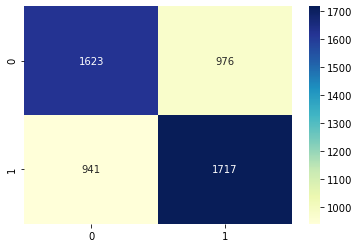

In [1020]:
lr = LogisticRegression(max_iter=2000)
lr.fit(xtrain,ytrain)
ypred_lr = lr.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_lr),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_lr))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2599
           1       0.96      0.85      0.90      2658

    accuracy                           0.91      5257
   macro avg       0.91      0.91      0.91      5257
weighted avg       0.91      0.91      0.91      5257



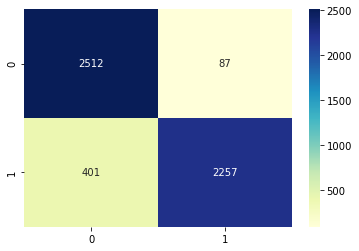

In [1021]:
rf = RandomForestClassifier(random_state=1)
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_rf),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_rf))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63      2599
           1       0.62      0.42      0.50      2658

    accuracy                           0.58      5257
   macro avg       0.59      0.58      0.57      5257
weighted avg       0.59      0.58      0.57      5257



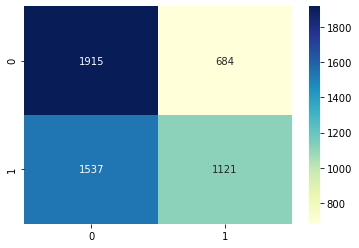

In [1022]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
ypred_gnb = gnb.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_gnb),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_gnb))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2599
           1       0.64      0.65      0.64      2658

    accuracy                           0.64      5257
   macro avg       0.64      0.64      0.64      5257
weighted avg       0.64      0.64      0.64      5257



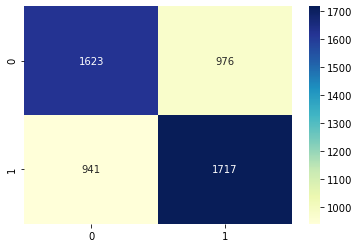

In [1023]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn = lr.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_knn),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_knn))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      2599
           1       0.67      0.72      0.69      2658

    accuracy                           0.68      5257
   macro avg       0.68      0.68      0.67      5257
weighted avg       0.68      0.68      0.68      5257



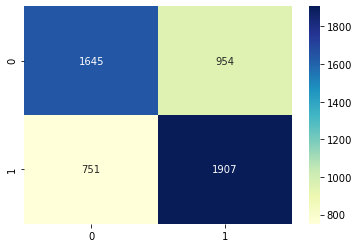

In [1024]:
svc = SVC()
svc.fit(xtrain,ytrain)
ypred_svc = svc.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_svc),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_svc))

[22:46:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      2599
           1       0.67      0.72      0.69      2658

    accuracy                           0.68      5257
   macro avg       0.68      0.68      0.67      5257
weighted avg       0.68      0.68      0.68      5257



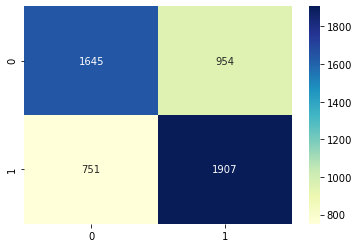

In [1025]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1,use_label_encoder=False)
xgb.fit(xtrain,ytrain)
ypred_xgb = svc.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_xgb),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_xgb))

#### It can be observed from the above results that randomforest performed the best among all the models. 

### Hyperparameter Tuning

In [1030]:
param_grid = {'criterion':['gini','entropy'],'min_samples_split':[2,10,20],\
              'max_depth':[None,2,5,10],'min_samples_leaf':[1,5,10],'max_leaf_nodes':[None,5,10,20]}

In [1034]:
# Grid search with Random Forest Model
rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(rf,param_grid,cv=2,n_iter=50,verbose=1,n_jobs=4,random_state=42)
grid_rf.fit(xtrain,ytrain)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 5, 10],
                                        'max_leaf_nodes': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20]},
                   random_state=42, verbose=1)

In [1035]:
grid_rf.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'entropy'}

In [1036]:
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2599
           1       0.97      0.85      0.90      2658

    accuracy                           0.91      5257
   macro avg       0.91      0.91      0.91      5257
weighted avg       0.91      0.91      0.91      5257



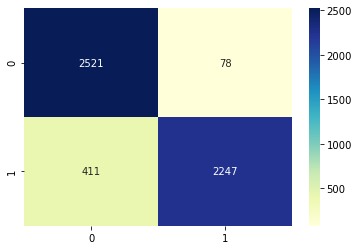

In [1038]:
tuned_rf = grid_rf.best_estimator_
tuned_rf.fit(xtrain,ytrain)
ypred_tuned_rf = tuned_rf.predict(xval)
sns.heatmap(confusion_matrix(yval,ypred_tuned_rf),annot=True,fmt='d',cmap='YlGnBu')
print(classification_report(yval,ypred_tuned_rf))

### Building model using the complete train data

In [1040]:
# Randomized search with Random Forest Model
model = RandomForestClassifier()
model = RandomizedSearchCV(model,param_distributions=param_grid,cv=2,
                             verbose=2,n_jobs=4,n_iter=50,random_state=42)
model.fit(x_sm,y_sm)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 5, 10],
                                        'max_leaf_nodes': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20]},
                   random_state=42, verbose=2)

In [1041]:
model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'entropy'}

In [1042]:
model.best_estimator_

RandomForestClassifier(criterion='entropy')

In [1043]:
tuned_model = model.best_estimator_
tuned_model.fit(x,y)
predictions = tuned_model.predict(test_scaled)

In [1047]:
probabilities = tuned_model.predict_proba(test_scaled)[:,1]

In [1048]:
results = pd.DataFrame()
results['RESTAURANT_SERIAL_NUMBER'] = test['RESTAURANT_SERIAL_NUMBER']
results['CLASSIFIER_PROBABILITY'] = probabilities
results['CLASSIFIER_PREDICTION'] = predictions

In [1051]:
results.to_csv('predictions.csv')

### RECOMMENDATIONS

#### The dataset can be improved by included more attributes. Here are some of the attributes I would recommend:
* Result of Inspection – Examples: In compliance, not in compliance, repeat violation.
* Inspection Grade – The grade assigned to the restaurant after the latest inspection.
* Program Category – A categorical feature that indicates the type of service provided. Examples: mobile food unit, not for profit - childcare, cloud kitchen.
* Maintenance of the Restaurant – A categorical feature that indicates the hygiene of the environment that includes cleanliness and equipment health.
* Wholesaler Rating – Indicates the quality of raw food products purchased from the wholesaler.
* Complaint and illness investigations – Item specific inspections based on a complaint received from the public or a potential food-borne illness
* Rating of the Chef
* Rating of the Restaurant
* Financial Status of the Restaurant